# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Practicum, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [46]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
    Excelente trabajo en tu sección de imports de Python. Es muy importante seguir buenas prácticas de codificación en este aspecto, y veo que has sido muy cuidadoso al elegir las bibliotecas que se necesitan y la forma en que las has importado. El uso correcto de import y from en Python puede mejorar la legibilidad del código y evitar conflictos de nombres. Continúa con el buen trabajo! </div>

<a name="indice"></a>
### Tabla de contenidos

- [1.2 Cargando los datos](#id1.2)
- [1.3 Preparando los datos](#id1.3)
    - [1.3.1 Planes](#id1.3.1)
        - [1.3.1.1 Corrigiendo datos](#id1.3.1.1)
        - [1.3.1.2 Enriqueciendo datos](#id1.3.1.1)
    - [1.3.2 Usuarios](#id1.3.2)
        - [1.3.2.1 Corrigiendo datos](#id1.3.2.1)
        - [1.3.2.2 Enriqueciendo datos](#id1.3.2.2)
    - [1.3.3 Llamadas](#id1.3.3)
        - [1.3.3.1 Corrigiendo datos](#id1.3.3.1)
        - [1.3.3.2 Enriqueciendo datos](#id1.3.3.2)
    - [1.3.4 Mensajes](#id1.3.4)
        - [1.3.4.1 Corrigiendo datos](#id1.3.4.1)
        - [1.3.4.2 Enriqueciendo datos](#id1.3.4.2)
    - [1.3.5 Intenet](#id1.3.5)
        - [1.3.5.1 Corrigiendo datos](#id1.3.5.1)
        - [1.3.5.2 Enriqueciendo datos](#id1.3.5.2)
    - [1.3.6 Conclusiones](#id1.3.6)
- [1.4 Estudiando las condiciones del plan](#id1.4)
- [1.5 Agregando datos por usuario](#id1.5)
    - [1.5.1 Calculando ingresos por usuario](#id1.5.1)
    - [1.5.2 Conclusiones y próximos pasos](#id1.5.2)
- [1.6 Estudiando el comportamiento del usuario](#id1.6)
    - [1.6.1 Llamadas](#id1.6.1)
        - [1.6.1.1 Conclusiones](#id1.6.1.1)
    - [1.6.2 Mensajes](#id1.6.2)
        - [1.6.2.1 Conclusiones](#id1.6.2.1)
    - [1.6.3 Internet](#id1.6.3)
        - [1.6.2.1 Conclusiones](#id1.6.3.1)
- [1.7 Ingreso](#id1.7)
    - [1.7.1 Conclusiones](#id1.7.1)
- [1.8 Probando las hipótesis estadísticas](#id1.8)
    - [1.8.1 Conclusiones](#id1.8.1)
- [1.9 Conclusión General](#id1.9)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Excelente que hayas incluido una tabla de contenidos en tu documento, esto facilitará la navegación y comprensión de los temas que estás tratando. ¡Sigue así!</div>
</div>


## Cargando los datos

Cargamos 5 tablas para nuestro análisis, 2 tablas dimencionales, que denominamos **plans** y **users**, donde tenemos la información de los planes que se ofrecen y los datos de 500 clientes seleccionados para nuestra muestra. El resto son 3 tablas transaccionales que contienen información de **llamadas**, uso de **internet** y **mensajería.**

[Regresar](#indice)

In [47]:
# Cargando los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Preparando los datos
<a name="id1.3"></a>
Mostraremos la información general de los DataFrame cargados.

[Regresar](#indice)

### Planes
<a name="id1.3.1"></a>
[Regresar](#indice)

In [48]:
# Mostrando la información general/resumen sobre el DataFrame de los planes

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [49]:
# Imprimiendo una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Conclusión intermedia**

Tenemos una tabla dimensional con los datos correctos para los beneficios que incluye cada uno de los planes que vamos a estudiar. Sin embargo, corregiremos el nombre de la columna "plan_name" a "plan" para normalizar este campo con respecto a la tabla de usuarios.

También agregaremos el límite de consumo de datos en gigabytes para hacer más fácil el cálculo de ingresos.

#### Corrigiendo datos
<a name="id1.3.1.1"></a>
[Regresar](#indice)

In [50]:
# Cambiando el nombre de la columna de planes

plans.rename(columns={'plan_name':'plan'}, inplace=True)
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan'],
      dtype='object')

#### Enriqueciendo datos
<a name="id1.3.1.2"></a>
[Regresar](#indice)

In [51]:
# agregando el límite en gigabytes para el consumo de datos.

plans['mb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)

plans['gb_per_month_included']

0    15.0
1    30.0
Name: gb_per_month_included, dtype: float64

### Usuarios
<a name="id1.3.2"></a>
[Regresar](#indice)

In [52]:
# Imprimiendo la información general/resumen sobre el DataFrame de los usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [53]:
# Imprime una muestra de los datos para los usuarios

users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [54]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [55]:
# Chequeando si existen usuarios duplicados.

users['user_id'].duplicated().sum()

0

**Conclusión Intermedia**

Nuestra tabla dimensional de clientes tiene los campos adecuados para nuestro análisis, sin embargo, debemos hacer un cambio en el tipo de datos del campo **reg_date**, se nos refleja como **object** y debería ser datetime.

Los valores nulos en churn_date no los vamos a tratar ya que estos usuarios aún mantienen un contrato activo con la telefónica.

Por otra parte, incluiremos el mes y año en que se registraron para un análisis posterior.

#### Corrigiendo datos
<a name="id1.3.2.1"></a>
Modificaremos el tipo de dato en nuestra variable **reg_date**.

[Regresar](#indice)

In [56]:
# Corrigiendo la fecha de registro.

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

# Comprobando si el cambio se realizó
print(users['reg_date'].dtype)

datetime64[ns]


#### Enriqueciendo datos
<a name="id1.3.2.2"></a>
Agregaramos las columans de mes y año en las que los usuarios se registraron para un posterior análisis.

[Regresar](#indice)

In [57]:
# Agregando mes y año de la fecha de registro en el plan seleccionado.

users['month'] = users['reg_date'].dt.month

# Comprobando si se realizó el cambio correctamente

users[['reg_date', 'month']].head()

,reg_date,month
0,2018-12-24,12
1,2018-08-13,8
2,2018-10-21,10
3,2018-01-28,1
4,2018-05-23,5


### Llamadas
<a name="id1.3.3"></a>
[Regresar](#indice)

In [58]:
# Mostrando la información/resumen general sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [59]:
# Imprimiendo una muestra de datos para llamadas
calls.head(15)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [60]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [61]:
# Chequeando si existen duplicados en nuestros datos.
calls.duplicated().sum()

0

**Conclusión Intermedia**

En el caso de esta tabla transaccional, tenemos el tipo de dato errado en la fecha de la llamada. Adicionalmente, debemos redondear hacia arriba los tiempos de duración de las llamadas ya que según la documentación de nuestros datos, Megaline redondea los segundos a minutos para los tiempos de llamada.

En el caso de las llamadas con tiempo de duración 0, las mantendremos para fines estadísticos de conteo de llamadas realizadas, hayan sido logradas o no.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Felicitaciones por incluir conclusiones intermedias en su proyecto! Esto es una práctica excelente ya que ayuda a comprender mejor los datos y a tomar decisiones informadas en la siguiente etapa del análisis. Continúa haciendo esto en futuros proyectos.</div>

#### Corrigiendo los datos
<a name="id1.3.3.1"></a>

In [62]:
# Cambiando el tipo de dato a fecha en el campo call_date

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

print(calls['call_date'].dtype)

datetime64[ns]


In [63]:
# Redondeando minutos hacia arriba para el cálculo posterior.

calls['duration'] = calls['duration'].apply(np.ceil)

# Comprobando el cambio
calls['duration'].head()

0     9.0
1    14.0
2    15.0
3     6.0
4     5.0
Name: duration, dtype: float64

#### Enriqueciendo datos
<a name="id1.3.3.2"></a>
Agregaremos el día de semana, mes y año de las llamadas en columnas separadas.

[Regresar](#indice)

In [64]:
# Agregando día de semana, mes y año de la llamada a la tabla

calls['month'] = calls['call_date'].dt.month

#Comprobando las columnas nuevas

calls[['call_date', 'month']].head()

,call_date,month
0,2018-12-27,12
1,2018-12-27,12
2,2018-12-27,12
3,2018-12-28,12
4,2018-12-30,12


### Mensajes
<a name="id1.3.4"></a>

[Regresar](#indice)

In [65]:
# Mostrando información/resumen general sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [66]:
# Imprimiendo una muestra de datos para los mensajes
messages.head(15)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [67]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [68]:
#Chequeando si existen duplicados

messages.duplicated().sum()

0

**Conclusión intermedia**

Al igual que en la tabla de llamadas, modificaremos el tipo de dato en la fecha del mensaje e incluiremos el día de semana, mes y año del mensaje.

#### Corrigiendo los datos
<a name="id1.3.4.1"></a>

[Regresar](#indice)

In [69]:
# Corrigiendo fecha

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

print(messages['message_date'].dtype)

datetime64[ns]


#### Enriqueciendo datos
<a name="id1.3.4.2"></a>

[Regresar](#indice)

In [70]:
# Agregando día de semana, mes y año de emisión del mensaje

messages['month'] = messages['message_date'].dt.month

# Comprobando nuevas columnas
messages[['message_date', 'month']].head()

,message_date,month
0,2018-12-27,12
1,2018-12-31,12
2,2018-12-31,12
3,2018-12-27,12
4,2018-12-26,12


### Internet
<a name="id1.3.5"></a>

[Regresar](#indice)

In [71]:
# Imprimiendo la información/resumen general sobre el DataFrame de los mensajes

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [72]:
# Imprimiendo una muestra de datos para el tráfico de internet
internet.head(15)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [73]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [74]:
# Verificando si hay duplicados

internet.duplicated().sum()

0

**Conclusión intermedia**

Debemos modificar el tipo de dato del campo de fecha de la sesión, agregaremos también la cantidad de gigabytes consumidos con base en los megabytes consumidos. Por otra parte incluiremos el mes de la sesión de datos para cálculos posteriores.

#### Corrigiendo datos
<a name="id1.3.5.1"></a>

[Regresar](#indice)

In [75]:
# Corrigiendo fecha

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

print(messages['message_date'].dtype)

datetime64[ns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Excelente trabajo!
 Es importante utilizar los objetos datetime porque proporcionan una funcionalidad adicional para trabajar con fechas y tiempos, como calcular la diferencia entre dos fechas, agrupar datos por año, mes o día, y mucho más. Además, al utilizar los objetos datetime, puedes asegurarte de que tus cálculos sean precisos y estén en el formato correcto. Sigue adelante con tu análisis y sigue utilizando esta práctica recomendada.</div>


#### Enriqueciendo datos
<a name="id1.3.5.2"></a>
[Regresar](#indice)

In [76]:
# Agregando día de semana, mes y año de emisión del mensaje

internet['month'] = internet['session_date'].dt.month

# Comprobando nuevas columnas
internet[['session_date','month']].head()

,session_date,month
0,2018-12-29,12
1,2018-12-31,12
2,2018-12-28,12
3,2018-12-26,12
4,2018-12-27,12


In [77]:
# Calculando la cantidad de megabytes consumidos

internet['gb_used'] = internet['mb_used'] / 1024

#Comprobando resultados

internet[['mb_used', 'gb_used']].head()

,mb_used,gb_used
0,89.86,0.087754
1,0.00,0.000000
2,660.40,0.644922
3,270.99,0.264639
4,880.22,0.859590


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Excelente trabajo!
Reddondeamos usando 2014 como el factor. Lo cuál es correcto</div>


### Conclusiones
<a name="id1.3.6"></a>
Luego de comprobar la naturaleza de nuestros datos y enriqueciendo las fechas de las transacciones realizadas en las diferentes tablas, podemos proceder a calcular el comportamiento de los 500 usuarios según las condiciones que apliquen.

[Regresar](#indice)

## Estudiando las condiciones del plan
<a name="id1.4"></a>
Mostramos nuevamente las condiciones por las que están regidos los clientes de los planes disponibles.

Con base en esta información procederemos hacer el cálculo de lo cobrado a los clientes.

[Regresar](#indice)

In [78]:
# Mostrando las condiciones de los planes
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregando datos por usuario
<a name="id1.5"></a>
En esta sección crearemos una data consolidada sobre el consumo de llamadas, mensajes e internet de los usuarios por mes.

[Regresar](#indice)

In [79]:
# Calculando el número de llamadas hechas por cada usuario por mes.

calls_data = calls.pivot_table(
    index = ['user_id', 'month'],
    values = 'id',
    aggfunc = 'count')

calls_data.reset_index(inplace=True)
calls_data.rename(columns={'id': 'call_count'}, inplace=True)

calls_data

,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [80]:
# Calculando la cantidad de minutos que usó cada usuario por mes
calls_minutes_data = calls.pivot_table(
    index = ['user_id', 'month'],
    values = 'duration',
    aggfunc = 'sum'
)

calls_minutes_data.reset_index(inplace=True)
calls_minutes_data

,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [81]:
# Calculando el número de mensajes enviados por cada usuario por mes
messages_data = messages.pivot_table(
    index = ['user_id', 'month'],
    values = 'id',
    aggfunc = 'count'
)
messages_data.reset_index(inplace=True)
messages_data.rename(columns={'id': 'message_count'}, inplace=True)
messages_data

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [82]:
# Calculando el volumen del trafico de internet usado por cada usuario por mes

mb_consume_data = internet.pivot_table(
    index = ['user_id', 'month'],
    values = 'gb_used',
    aggfunc = 'sum')
mb_consume_data.reset_index(inplace=True)

# Redondeando gigabytes para cálculo según tarifa

mb_consume_data['gb_used'] = mb_consume_data['gb_used'].apply(np.ceil)

mb_consume_data

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Correcto. Sin embargo el no utilizar operaciones vectorizadas afecta el desempeño de nuestros cálculos, resultado en ejecuciones más lentas. Puedes aplicar la función np.ceil a la columna sin el uso de apply. 
    
<code> mb_month['gb_round'] = np.ceil(mb_month['gb_round']) </code>
</div>

**Conclusión intermedia**

Luego de crear las diferentes pivots, uniremos todo en un data frame que represente el consumo del usuario segmentado por mes.

In [83]:
# Combinando los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

calc_data = calls_data.merge(calls_minutes_data, on=['user_id','month'], how='outer')
calc_data = calc_data.merge(messages_data, on=['user_id','month'], how='outer')
calc_data = calc_data.merge(mb_consume_data, on=['user_id','month'], how='outer')
calc_data = calc_data.merge(users[['user_id', 'plan', 'city']], on='user_id', how='left')
calc_data.fillna(0, inplace=True)
calc_data

,user_id,month,call_count,duration,message_count,gb_used,plan,city
0,1000,12,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,5,0.0,0.0,2.0,2.0,surf,"Birmingham-Hoover, AL MSA"
2290,1482,10,0.0,0.0,2.0,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,12,0.0,0.0,0.0,1.0,ultimate,"Salt Lake City, UT MSA"


<div class="alert alert-block alert-success
            ">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Correcto. Consideraste las operaciones, outer y left en los casos que fuera necesario. 
</div>

**Próximos pasos**

Agregaremos la información de los planes a nuestra data para el cálculo, para que de esta manera tengamos todos los datos necesarios para el cálculo en una sola tabla.


In [84]:
# Agregando las condiciones de nuestro plan a la tabla de cálculos

calc_data = calc_data.merge(plans, on='plan', how='left')
calc_data.head()

,user_id,month,call_count,duration,message_count,gb_used,plan,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03


### Calculando ingresos por usuario
<a name="id1.5.1"></a>
Agregaremos los ingresos generados por los 3 tipo de servicios que se ofrecen para tener un panorama sobre el margen de rentabilidad por plan.

[Regresar](#indice)

In [85]:
# Calculando el ingreso mensual de llamadas para cada usuario

calc_data['calls_income'] = ((calc_data['duration'] - calc_data['minutes_included']) * calc_data['usd_per_minute'])
calc_data.loc[calc_data['calls_income'] < 0, 'calls_income'] = 0

# Comprobando filas donde sí se generó ingreso por llamadas

calc_data.loc[calc_data['calls_income'] > 0,
              ['duration', 'minutes_included','usd_per_minute','calls_income']].head()

,duration,minutes_included,usd_per_minute,calls_income
9,1104.0,500,0.03,18.12
23,645.0,500,0.03,4.35
24,524.0,500,0.03,0.72
25,617.0,500,0.03,3.51
29,534.0,500,0.03,1.02


In [86]:
# Calculando el ingreso mensual de mensajería para cada usuario

calc_data['message_income'] = ((calc_data['message_count'] - calc_data['messages_included']) * calc_data['usd_per_message'])
calc_data.loc[calc_data['message_income'] < 0, 'message_income'] = 0

# Comprobando filas donde sí se generó ingreso por mensajería

calc_data.loc[calc_data['message_income'] > 0,
              ['message_count', 'messages_included','usd_per_message','message_income']].head()

,message_count,messages_included,usd_per_message,message_income
3,53.0,50,0.03,0.09
21,51.0,50,0.03,0.03
23,59.0,50,0.03,0.27
57,64.0,50,0.03,0.42
58,68.0,50,0.03,0.54


In [87]:
# Calculando el ingreso mensual de internet para cada usuario

calc_data['internet_income'] = ((calc_data['gb_used'] - calc_data['gb_per_month_included']) * calc_data['usd_per_gb'])
calc_data.loc[calc_data['internet_income'] < 0, 'internet_income'] = 0

# Comprobando filas donde sí se generó ingreso por mensajería

calc_data.loc[calc_data['internet_income'] > 0,
              ['gb_used', 'gb_per_month_included','usd_per_gb','internet_income']].head()

,gb_used,gb_per_month_included,usd_per_gb,internet_income
3,22.0,15.0,10,70.0
4,19.0,15.0,10,40.0
5,19.0,15.0,10,40.0
7,19.0,15.0,10,40.0
9,27.0,15.0,10,120.0


In [88]:
# Creando columna con los ingresos totales por usuario

calc_data['total_income'] = (calc_data['calls_income'] + calc_data['message_income'] 
                             + calc_data['internet_income'] + calc_data['usd_monthly_pay'])

# Comprobando la nueva columna
calc_data.loc[calc_data['total_income'] > 0,
             ['calls_income', 'message_income', 'internet_income', 'usd_monthly_pay', 'total_income']
             ].head()

,calls_income,message_income,internet_income,usd_monthly_pay,total_income
0,0.0,0.00,0.0,70,70.00
1,0.0,0.00,0.0,20,20.00
2,0.0,0.00,0.0,20,20.00
3,0.0,0.09,70.0,20,90.09
4,0.0,0.00,40.0,20,60.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Correcto. Tome una muestra para validar los datos y tu tabla final tiene las dimensiones y operacciones correctas.
</div>

In [90]:
#muestra agregada por el revisor
calc_data.query("user_id == 1001").sort_values(by='month')

,user_id,month,call_count,duration,message_count,gb_used,plan,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,calls_income,message_income,internet_income,total_income
1,1001,8,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
2,1001,9,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.00,0.0,20.00
3,1001,10,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.09,70.0,90.09
4,1001,11,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00
5,1001,12,56.0,412.0,44.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.00,40.0,60.00


### Conclusiones y próximos pasos
<a name="id1.5.2"></a>
Luego de realizar los cálculos correspondientes tenemos los ingresos por tipo de servicio y totales de usuario por mes.

A continuación, estudiaremos el comportamiento de los usuarios según el tipo de servicio utilizado.

[Regresar](#indice)

## Estudiando el comportamiento del usuario
<a name="id1.6"></a>

En esta sección estudiaremos el comportamiento por tipo de plan según los servicios que ofrecemos a nuestro cliente. Tabularemos por llamadas, mensajes e internet.

Posterior al estudio del comportamiento del usuario, evaluaremos el comportamiento de los ingresos.

[Regresar](#indice)

### Llamadas
<a name="id1.6.1"></a>

[Regresar](#indice)

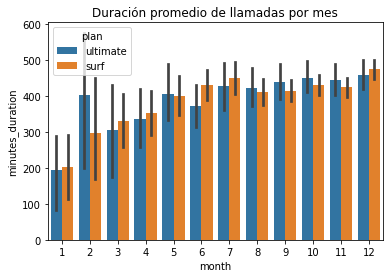

In [91]:
# Comparando la duración de llamadas por cada plan por cada mes
sns.barplot(data=calc_data, x='month', y='duration', hue='plan').set(title='Duración promedio de llamadas por mes')
sns.set(rc={'figure.figsize':(12,6)})
plt.ylabel('minutes_duration')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Quiero felicitarte por utilizar un gráfico de barras  en seaborn para comparar la duración promedio de llamadas entre los planes telefónicos. Quisiera señalar que este gráfico utiliza un estimador por defecto, el cuál es mean. 

Al utilizar el estimador mean, has obtenido una buena medida de la duración promedio de las llamadas por mes para cada plan telefónico, lo cual es útil para comparar la diferencia entre los planes en términos de duración promedio. Sin embargo, si deseas explorar más a fondo los datos, puedes probar diferentes estimadores, que pueden proporcionar información valiosa sobre la distribución de la duración de las llamadas para cada plan.
    
También quiero señalar que la barra que se extiende por arriba nos indica la desviación estándar a un nivel de confianza por defecto del 95% y nos índica la variablidad de los datos. 
</div>

**Conclusión intermedia**

Podemos observar que la duración promedio de las llamadas en los dos planes (surf y ultimate) suelen ser muy parecidas, ambas con tendencia ascendente en el transcurso del año, sin embargo, observamos un pico de los usuarios del plan ultimate en el mes de febrero.

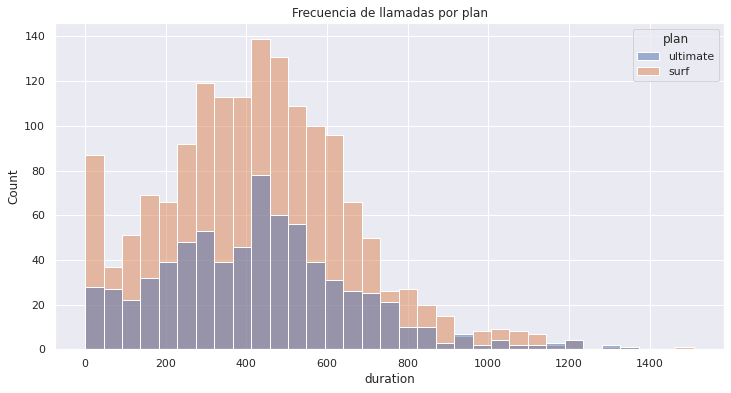

In [92]:
# Comparando el número de minutos que los usuarios de cada plan requieren cada mes.
sns.histplot(data=calc_data, x='duration', hue='plan').set(title='Frecuencia de llamadas por plan')
# plt.vlines(x=(x_line_left, x_line_right), ymin=0, ymax=140)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Correcto. Identificar la distribución de los datos mediante un histograma es importante porque nos permite comprender mejor las características de los datos y obtener información útil para la toma de decisiones. En el caso de las llamadas telefónicas, por ejemplo, la distribución de la duración de las llamadas podría seguir una distribución binomial, lo que indica que la probabilidad de que una llamada dure más de cierta cantidad de minutos es mayor o menor dependiendo del plan que tenga el usuario.

Utilizando estimadores, como el valor medio y la desviación estándar, podemos hacer predicciones sobre cómo se distribuirán las llamadas en el futuro y estimar la cantidad de recursos necesarios para manejar el volumen de llamadas en un determinado período de tiempo. Por ejemplo, si sabemos que el plan A tiene una distribución de duración de llamadas con una media de 5 minutos y una desviación estándar de 1 minuto, podemos utilizar esta información para estimar la cantidad de llamadas que superarán los 6 minutos y tomar decisiones sobre cómo asignar recursos para manejar estas llamadas.
</div>

**Conclusión intermedia**

De igual forma, podemos ver que la distribución de llamadas realizadas es similar en ambos planes. Destacando que para ambos grupos de usuarios, el tiempo promedio de duración de sus llamadas es de 400 a 450 minutos por mes.

In [93]:
# Calculando la media y la varianza de la duración mensual de llamadas por plan.
calc_data.pivot_table(
    index='month', columns='plan',
    values='duration', aggfunc=['mean', np.var])

mean                       var              
plan         surf    ultimate          surf      ultimate
month                                                    
1      203.000000  193.500000  15842.000000  16572.333333
2      297.000000  403.142857  52226.500000  76889.476190
3      330.000000  304.250000  35809.363636  61984.931818
4      351.540000  336.857143  50866.743265  34888.928571
5      399.584416  406.241379  59754.219754  43841.046798
6      431.298969  370.957447  45592.628436  42503.563367
7      449.983471  427.067797  61005.099725  72563.374635
8      410.111111  421.436620  54344.645963  53645.506640
9      414.226804  437.511628  46595.958656  57070.464569
10     429.729958  450.735849  52278.664056  54261.910512
11     423.325088  445.196850  51607.021602  60593.222847
12     473.836478  459.099338  63629.518918  62503.783400

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Excelente uso de una pivot table para operar fácilmente en el data set.
</div>

In [94]:
# Creando umbral de consumo de minutos para el plan surf

surf_minutes_limit = plans['minutes_included'][0]

surf_minutes_limit

500

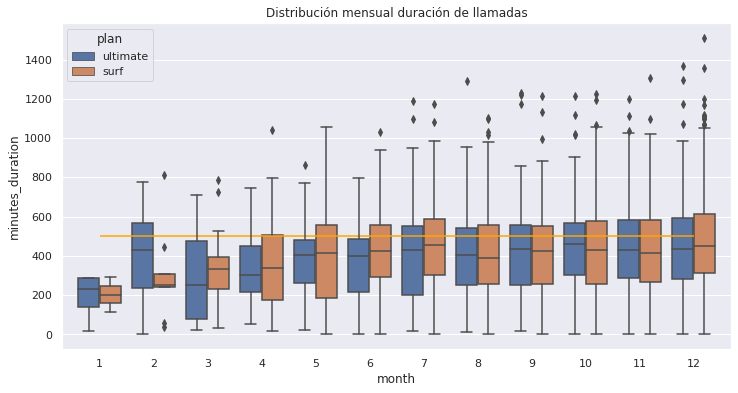

In [95]:
# Trazamos un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
sns.boxplot(data=calc_data, x='month', y='duration', hue='plan').set(title='Distribución mensual duración de llamadas')
plt.ylabel('minutes_duration')
plt.hlines(y=surf_minutes_limit, xmin=0, xmax=11, color='orange')
plt.show()

#### Conclusiones
<a name="id1.6.1.1"></a>
Al calcular los promedios y varianzas de la duración mensual de llamadas, podemos identificar que los usuarios se comportan en su mayoría de igual forma. En los meses de febrero y marzo existe el caso extraordinario donde el consumo de minutos de los clientes **"ultimate"** supera con un gran margen al plan **"surf"**. Sin embargo, también se tiene que destacar que el consumo de los clientes **"surf"** generalmente supera el umbral de minutos incluídos en su plan de llamadas, generando a su vez un mayor margen de ingresos.

[Regresar](#indice)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
¡Excelente trabajo en este código y en las conclusiones!

Las conclusiones son muy acertadas al señalar que en general, los usuarios se comportan de manera similar en cuanto a la duración de sus llamadas mensuales. Sin embargo, existen algunos meses donde el consumo de minutos por parte de los clientes de "ultimate" es mucho mayor que el de los clientes de "surf". Es importante investigar por qué sucede esto y ver si se pueden tomar medidas para aprovechar esta oportunidad.

Además, al destacar que el consumo de los clientes de "surf" generalmente supera el umbral de minutos incluidos en su plan de llamadas, se indica que podría haber una oportunidad para el negocio de ofrecer un plan que se adapte mejor a las necesidades de los clientes y reducir su exposición a costos adicionales.

</div>

### Mensajes
<a name="id1.6.2"></a>

[Regresar](#indice)

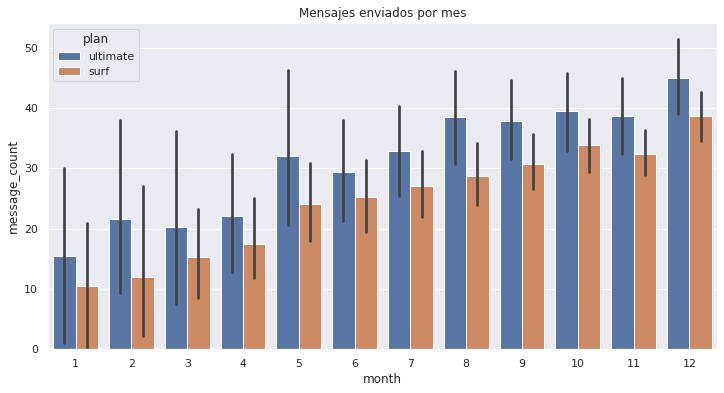

In [96]:
# Comprarando el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sns.barplot(data=calc_data, x='month', y='message_count', hue='plan').set(title='Mensajes enviados por mes')
plt.show()

**Conclusión intermedia**

Al igual que con las llamadas, en promedio, los usarios de ambos planes muestran una tendencia ascendente a lo largo del año y nuestros usuarios "ultimate" prevalecen en el envío de mensajeria respecto al plan "surf", aunque ninguno de los dos tipos de usuario se exceden del límite de mensajes para según las condiciones de sus planes (50 para **surf**, 1000 para **ultimate**).

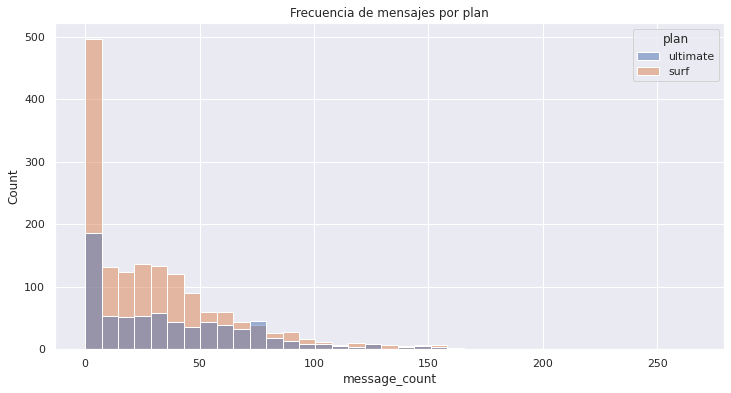

In [97]:
# Comparando el número de mensajes que los usuarios de cada plan requieren cada mes.
sns.histplot(data=calc_data, x='message_count', hue='plan').set(title='Frecuencia de mensajes por plan')
# plt.vlines(x=50, ymin=0, ymax=200)
plt.show()

**Conclusión intermedia**

La mayoría de nuestros usuarios de ambos planes envía menos de 50 mensajes por mes. Adicionalmente, se puede ver que las distribuciones de ambos planes son muy parecidas.

In [98]:
# Calculando la media y la varianza de la duración mensual de mensajería por plan.
calc_data.pivot_table(
    index='month', columns='plan',
    values='message_count', aggfunc=['mean', np.var])

mean                     var             
plan        surf   ultimate         surf     ultimate
month                                                
1      10.500000  15.500000   220.500000   313.666667
2      12.000000  21.571429   386.000000   478.285714
3      15.260870  20.250000   346.565217   654.386364
4      17.400000  22.047619   501.591837   544.147619
5      24.012987  32.103448   847.197198  1297.310345
6      25.298969  29.340426   914.920103   857.620722
7      27.033058  32.830508   923.915565   960.488019
8      28.777778  38.478873  1029.515528  1196.367404
9      30.762887  37.895349  1003.829496  1050.918331
10     33.839662  39.443396  1275.465708  1221.106289
11     32.385159  38.606299  1065.344034  1232.669166
12     38.600629  45.006623  1458.158612  1549.419956

In [99]:
# # Creando umbral de envío de mensajes para el plan surf

surf_messages_limit = plans['messages_included'][0]

surf_messages_limit

50

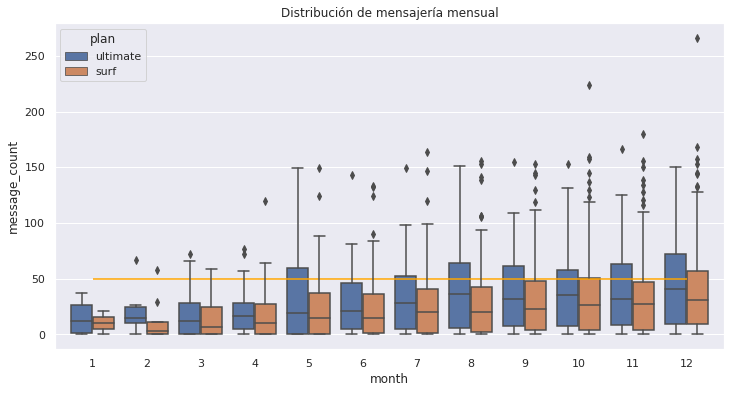

In [100]:
# Trazamos la distribución de la cantidad de mensajes enviados mensualmente

sns.boxplot(data=calc_data, x='month', y='message_count', hue='plan').set(title='Distribución de mensajería mensual')
plt.hlines(y=surf_messages_limit, xmin=0, xmax=11, color='orange')
plt.show()

#### Conclusiones
<a name="id1.6.2.1"></a>
Luego de observar nuestras distribuciones, se puede destacar que los clientes con plan ultimate envían más mensajes de texto que los clientes surf. Por otra parte, los clientes surf rara vez suelen excederse del umbral de mensajería que les ofrece su plan, por lo tanto podemos inferir que el margen de ingreso por este tipo de servicio no suele ser tan grande. Sólo en el mes de diciembre se nota un aumento importante en el envío de mensajes que se traducen en un mayor margen de ingresos para este servicio.

[Regresar](#indice)

### Internet
<a name="id1.6.3"></a>

[Regresar](#indice)

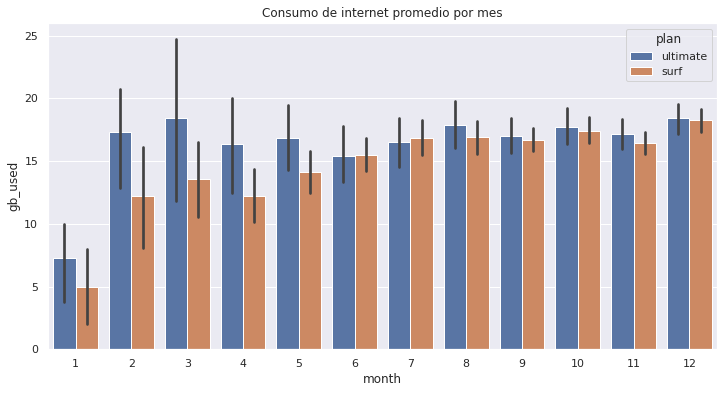

In [101]:
# Comparando tráfico de internet consumido por usuarios por plan
sns.barplot(data=calc_data, x='month', y='gb_used', hue='plan').set(title='Consumo de internet promedio por mes')
plt.show()

**Conclusión intermedia**

Nuestros usuarios ultimate en promedio suelen consumir una mayor cantidad de gigabytes por mes aunque el consumo suele ser muy parecido entre ambos tipos de usuario. También es importante destacar que el consumo tiene una tendencia ascendente en el transcurso del año. Aunque los meses de invierno suelen ser los que mayor tráfico tienen de parte de nuestros usuarios ultimate.

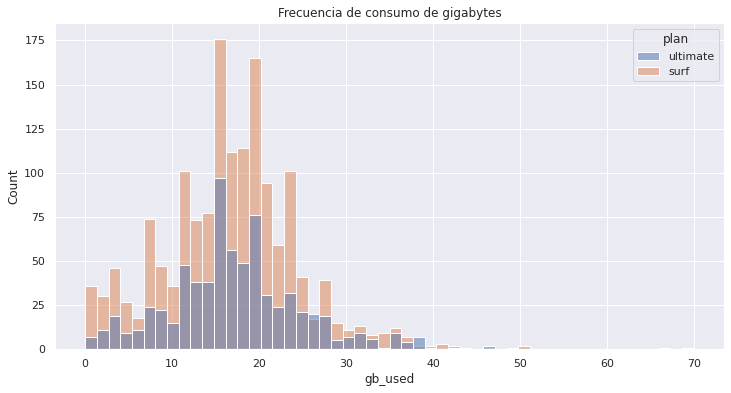

In [102]:
# Mostrando frecuencia de consumo de gigabytes por mes

sns.histplot(data=calc_data, x='gb_used', hue='plan').set(title='Frecuencia de consumo de gigabytes')
plt.show()

**Conclusión intermedia**

La mayor parte de nuestros clientes en promedio consume entre 12 y 22 gigabytes por mes. A pesar de que el comportamiento del consumo parece ser similar en ambos tipo de clientes, el cliente surf, suele excederse de los 15 gb establecidos en su plan de consumo de internet.

In [103]:
# Calculando la media y la varianza de la duración mensual de mensajería por plan.
calc_data.pivot_table(
    index='month', columns='plan',
    values='gb_used', aggfunc=['mean', np.var])

mean                   var            
plan        surf   ultimate       surf    ultimate
month                                             
1       5.000000   7.250000  18.000000   14.916667
2      12.222222  17.285714  41.444444   37.904762
3      13.565217  18.416667  63.984190  138.628788
4      12.220000  16.333333  56.215918   85.833333
5      14.116883  16.862069  58.183527   54.194581
6      15.484536  15.425532  47.752363   68.858464
7      16.876033  16.491525  61.476171   64.254237
8      16.882716  17.845070  71.420942   58.047082
9      16.690722  17.011628  49.240639   47.258687
10     17.409283  17.716981  60.725846   54.604852
11     16.431095  17.118110  54.607824   54.390701
12     18.238994  18.397351  69.210841   58.841060

In [104]:
# Creando umbral de consumo de internet para el plan surf

surf_gb_limit = plans['gb_per_month_included'][0]

# Creando umbral de consumo de internet para el plan ultimate
ultimate_gb_limit = plans['gb_per_month_included'][1]

print(surf_gb_limit, ultimate_gb_limit)

15.0 30.0


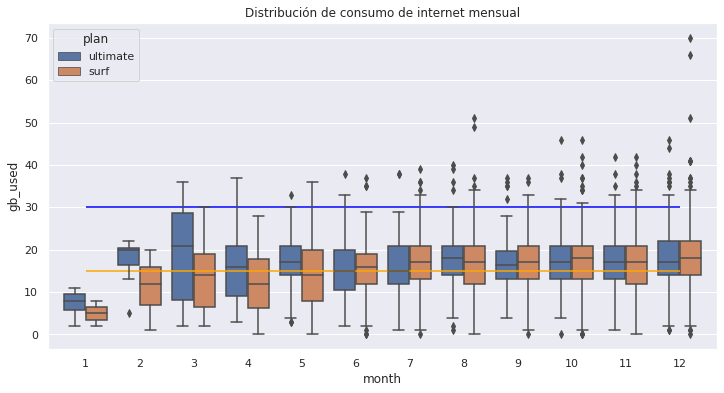

In [105]:
# Trazamos la distribución del consumo de internetmensualmente

sns.boxplot(data=calc_data, x='month', y='gb_used', hue='plan').set(title='Distribución de consumo de internet mensual')
plt.hlines(y=(surf_gb_limit, ultimate_gb_limit), xmin=0, xmax=11, color=['orange', 'blue'])
plt.show() 

#### Conclusiones

Al análizar nuestras distribuciones, vemos que en el consumo de internet es en donde se suelen exceder los límites de consumo para ambos planes, sin embargo, es en nuestro plan surf donde el consumo suele estar por encima del umbral de consumo de datos establecido en el plan. Probablemente, es en este servicio donde se genere el mayor márgen de ingresos.

[Regresar](#indice)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
Excelente, desarrollo de las conclusiones y los gráficos. todo está muy bien ordenado y se comunica claramente los resultados.
</div>

## Ingreso
<a name="id1.7"></a>

Observaremos el comportamiento de los ingresos generados a través de nuestros 3 servicios incluídos en nuestros planes.

[Regresar](#indice)

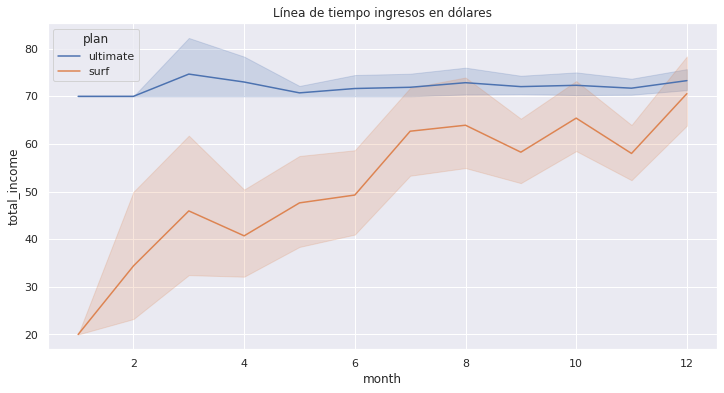

In [106]:
# Mostrando una línea de tiempo que refleje el comportamiento de las ganancias a lo largo del año

sns.lineplot(data=calc_data, x='month', y='total_income', hue='plan').set(title='Línea de tiempo ingresos en dólares')
plt.show()

**Conclusión intermedia**

Considerando que los usuarios del plan surf suelen excederse de los límites establecidos en su plan, nuestro plan ultimate es quien prevalece como el mayor generador de ingresos. Si bien, en los meses de verano el comportamiento de ingresos se acerca, no resulta lo suficiente como para considerarlo por encima del plan ultimate.

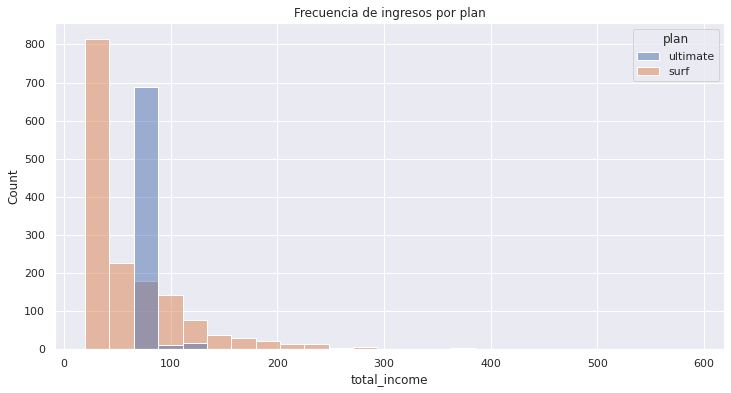

In [107]:
# Mostrando frecuencia de consumo de gigabytes por mes

sns.histplot(data=calc_data, x='total_income', hue='plan', bins=25).set(title='Frecuencia de ingresos por plan')
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si se tienen muchos datos atípicos al analizar una variable con histogramas, una posible estrategia sería considerar un bining diferente o la posibilidad de realizar una transformación en los datos antes de representarlos en el histograma.

Por ejemplo, si se tiene una distribución muy asimétrica o con muchos valores atípicos en la cola izquierda, se podría aplicar una transformación logarítmica o una raíz cuadrada a los datos antes de graficarlos. Esto podría ayudar a reducir la asimetría de la distribución y hacer que los datos atípicos se representen de manera más adecuada en el histograma.

Otra estrategia sería considerar la posibilidad de utilizar un tipo de gráfico diferente que permita representar mejor los datos atípicos,como un gráfico de densidad. <div> 

**Conclusión intermedia**

Podemos deducir a través de nuestro histograma que nuestros clientes ultimate generan entre 70 a 120 dólares por mes, sin embargo, nuestros clientes surf tienen una desviación mayor generando desde 20 a más de 200 dólares por mes.

In [108]:
# Analizando el comportamiento de las ganancias por tipo de plan

calc_data.pivot_table(
    index='month', columns='plan',
    values='total_income', aggfunc=['mean', np.var])


mean                     var            
plan        surf   ultimate         surf    ultimate
month                                               
1      20.000000  70.000000     0.000000    0.000000
2      34.396667  70.000000   428.276100    0.000000
3      45.941304  74.666667  1512.023512  145.515152
4      40.710600  73.000000  1198.958402  120.400000
5      47.628182  70.724138  1967.540055   15.206897
6      49.276289  71.638298  1988.914046   75.018501
7      62.674050  71.898305  2943.388409  104.472238
8      63.931173  72.859155  3587.494901  154.808451
9      58.271495  72.034884  2260.644980   75.939945
10     65.421224  72.311321  3198.242612  169.606918
11     58.004276  71.708661  2494.182230   94.668416
12     70.557044  73.291391  4604.410868  212.861192

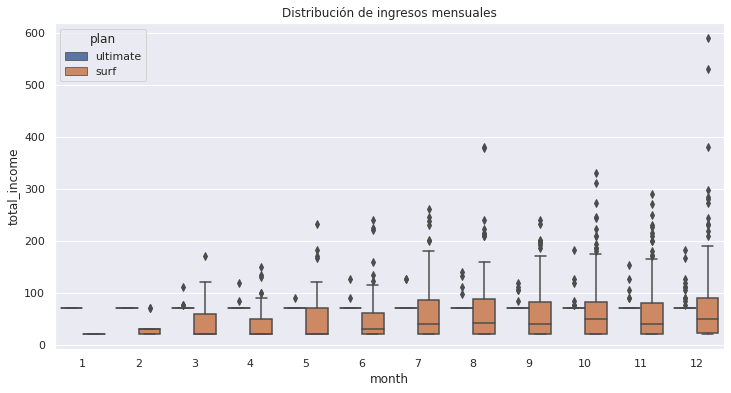

In [109]:
# Trazamos la distribución de los ingresos por plan, mensualmente

sns.boxplot(data=calc_data, x='month', y='total_income', hue='plan').set(title='Distribución de ingresos mensuales')
# plt.hlines(y=(surf_gb_limit, ultimate_gb_limit), xmin=0, xmax=11, color=['orange', 'blue'])
plt.show() 

### Conclusiones
<a name="id1.7.1"></a>
Luego de observar nuestras distribuciones, se demuestra que los ingresos generados en el plan ultimate suelen ser más estables en el paso del tiempo, pero en el plan surf pueden ser superiores por un margen importante.

[Regresar](#indice)

## Probando las hipótesis estadísticas.
<a name="id1.8"></a>
En primer lugar nuestra hipótesis nula es si los ingresos por tipo de plan son diferentes.

[Regresar](#indice)

In [110]:
# Probando hipótesis núla sobre si los ingrésos son diferentes
surf_income_series = calc_data.loc[calc_data['plan'] == 'surf', 'total_income']

ultimate_income_mean = calc_data.loc[calc_data['plan'] == 'ultimate']['total_income'].mean()

alpha = 0.05

plan_hypothesis_results = st.ttest_1samp(surf_income_series, ultimate_income_mean)

print('p-value: ', plan_hypothesis_results.pvalue)

if plan_hypothesis_results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  2.0160297778788502e-16
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
   Correcto. Se rechaza la hipótesis nula. Es decir, se concluye que el ingreso promedio de los usuarios difiere según el plan adquirido.

</div>

**Conclusión intermedia**

Rechazamos la hipótesis de que los ingresos por tipo de plan son diferentes estadísticamente.

In [111]:
# Probando hipótesis núla sobre si los ingrésos de los usuarios en NY-NJ son diferentes al resto de la población

new_york_income_mean = calc_data.loc[calc_data['city'].str.contains('NY-NJ')]['total_income'].mean()
city_income_series = calc_data.loc[~(calc_data['city'].str.contains('NY-NJ')), 'total_income']

city_hypothesis_results = st.ttest_1samp(city_income_series, new_york_income_mean)

print('p-value: ', city_hypothesis_results.pvalue)

if city_hypothesis_results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  9.418519495015265e-07
Rechazamos la hipótesis nula



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a><br>
   Correcto. Se rechaza la hipótesis nula. Es decir, se concluye que el ingreso promedio de los usuarios difiere según la ubicación.

</div>


### Conclusiones
<a name="id1.8.1"></a>
No podemos aceptar la hipótesis que los ingresos por tipo de plan sean diferentes, ni podemos aceptar que los ingresos por los clientes del estado de Nueva York y Nueva Jersey sean superiores al resto. Utilizamos la prueba t, ya que queríamos comprobar la hipótesis sin importar si era mayor o menor.

[Regresar](#indice)

## Conclusión general
<a name="id1.9"></a>
Los ingresos de nuestros clientes predominan en el plan ultimate, sin embargo, el plan surf demostró que tiene capacidad para superar en ingresos al ultimate potenciar la inversión en dicho plan puede llevar a generar un mejor flujo de ingresos. Por otra parte también habría que evaluar los costos operativos para determinar el márgen de rentabilidad por cada plan.

Por último evaluamos a través de una prueba de hipótesis de 2 colas, si los ingresos de los planes de tipo surf y ultimate eran diferentes; rechazamos la hipótesis de acuerdo a los resultados de nuestra prueba. 

De igual forma, se evaluó si los clientes que residen en el estado de Nueva York generaban un mejor ingreso que el resto de la población estudiada y rechazamos esta hipótesis también.

[Regresar](#indice)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Excelente!  &#x1F680; <br>

Destaco la manera en que has abordado el problema y atendido a las recomendaciones. Has logrado un muy buen trabajo. 
Aprobamos el proyecto.&#128077;
</div>
